In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
5,1.7,0.4,setosa
6,1.4,0.3,setosa
7,1.5,0.2,setosa
8,1.4,0.2,setosa
9,1.5,0.1,setosa


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [7]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
y = df['species'].map(species_to_num)

In [12]:
y = y.astype(int)
y.unique()

array([0, 1, 2], dtype=int64)

In [13]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

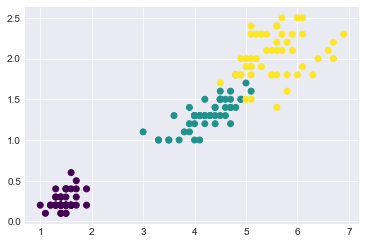

In [14]:
plt.scatter(X["petal_length"],X["petal_width"],c=y,cmap='viridis')

In [15]:
clf.predict([[6, 2]])

array([2])

In [21]:
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [19]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [20]:
Xv

array([[1.4],
       [0.2],
       [1.4],
       [0.2],
       [1.3],
       [0.2],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.7],
       [0.4],
       [1.4],
       [0.3],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.5],
       [0.1],
       [1.5],
       [0.2],
       [1.6],
       [0.2],
       [1.4],
       [0.1],
       [1.1],
       [0.1],
       [1.2],
       [0.2],
       [1.5],
       [0.4],
       [1.3],
       [0.4],
       [1.4],
       [0.3],
       [1.7],
       [0.3],
       [1.5],
       [0.3],
       [1.7],
       [0.2],
       [1.5],
       [0.4],
       [1. ],
       [0.2],
       [1.7],
       [0.5],
       [1.9],
       [0.2],
       [1.6],
       [0.2],
       [1.6],
       [0.4],
       [1.5],
       [0.2],
       [1.4],
       [0.2],
       [1.6],
       [0.2],
       [1.6],
       [0.2],
       [1.5],
       [0.4],
       [1.5],
       [0.1],
       [1.4],
       [0.2],
       [1.5],
       [0.2],
       [1.2],
      

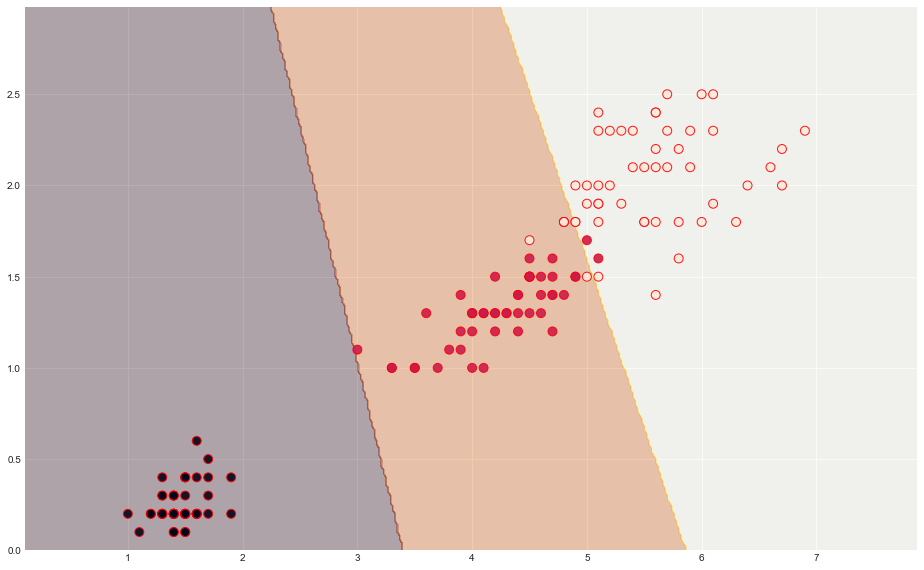

In [23]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='r');

## Linear SVM Implementation

In [13]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['species'],axis=1)
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [14]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [15]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cross Validation within Train Dataset

In [17]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9404
Accuracy SD: 		 0.0664


In [18]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 32,  5],
       [ 0,  2, 42]], dtype=int64)

In [20]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9429
Recall Score: 		 0.9417
F1 Score: 		 0.9414


#### Cross Validation within Test Dataset

In [21]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [23]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9690
Recall Score: 		 0.9667
F1 Score: 		 0.9658


## Polynomial SVM Implementation

In [24]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [25]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [26]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [27]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.0712


In [28]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [29]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [30]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9570
Recall Score: 		 0.9500
F1 Score: 		 0.9500


#### Cross Validation within Test Dataset

In [31]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

ValueError: operands could not be broadcast together with shapes (30,4) (2,) (30,4) 

In [32]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [33]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9690
Recall Score: 		 0.9667
F1 Score: 		 0.9658


***
# Gaussian Radial Basis Function (rbf)

In [34]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [35]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [36]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [37]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [38]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [39]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [40]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584
